In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
data_path = "../data/asthma_disease_data.csv"
df = pd.read_csv(data_path)

df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


In [12]:
# Check the shape of the dataset
print("Dataset Shape:", df.shape)

Dataset Shape: (2392, 29)


In [16]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 PatientID                 0
Age                       0
Gender                    0
Ethnicity                 0
EducationLevel            0
BMI                       0
Smoking                   0
PhysicalActivity          0
DietQuality               0
SleepQuality              0
PollutionExposure         0
PollenExposure            0
DustExposure              0
PetAllergy                0
FamilyHistoryAsthma       0
HistoryOfAllergies        0
Eczema                    0
HayFever                  0
GastroesophagealReflux    0
LungFunctionFEV1          0
LungFunctionFVC           0
Wheezing                  0
ShortnessOfBreath         0
ChestTightness            0
Coughing                  0
NighttimeSymptoms         0
ExerciseInduced           0
Diagnosis                 0
DoctorInCharge            0
dtype: int64


In [11]:
# Get a summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2392 non-null   int64  
 1   Age                     2392 non-null   int64  
 2   Gender                  2392 non-null   int64  
 3   Ethnicity               2392 non-null   int64  
 4   EducationLevel          2392 non-null   int64  
 5   BMI                     2392 non-null   float64
 6   Smoking                 2392 non-null   int64  
 7   PhysicalActivity        2392 non-null   float64
 8   DietQuality             2392 non-null   float64
 9   SleepQuality            2392 non-null   float64
 10  PollutionExposure       2392 non-null   float64
 11  PollenExposure          2392 non-null   float64
 12  DustExposure            2392 non-null   float64
 13  PetAllergy              2392 non-null   int64  
 14  FamilyHistoryAsthma     2392 non-null   

In [9]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print("Duplicate Rows:", duplicates)

Duplicate Rows: 0


In [7]:
# Get basic statistics
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,...,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,6229.500000,42.137960,0.493311,0.669732,1.307274,27.244877,0.141722,5.051786,5.022867,7.019012,...,0.158027,2.548564,3.741270,0.596154,0.500418,0.503344,0.503344,0.602425,0.604933,0.051839
std,690.655244,21.606655,0.500060,0.986120,0.898242,7.201628,0.348838,2.903574,2.909980,1.732475,...,0.364842,0.861809,1.303689,0.490770,0.500104,0.500093,0.500093,0.489499,0.488967,0.221749
min,5034.000000,5.000000,0.000000,0.000000,0.000000,15.031803,0.000000,0.001740,0.003031,4.001437,...,0.000000,1.000459,1.500045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5631.750000,23.000000,0.000000,0.000000,1.000000,20.968313,0.000000,2.578333,2.432043,5.498500,...,0.000000,1.824113,2.607489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6229.500000,42.000000,0.000000,0.000000,1.000000,27.052202,0.000000,5.016881,5.115383,6.975839,...,0.000000,2.553244,3.734982,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,6827.250000,61.000000,1.000000,1.000000,2.000000,33.555903,0.000000,7.540234,7.544216,8.526950,...,0.000000,3.292897,4.864121,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,7425.000000,79.000000,1.000000,3.000000,3.000000,39.985611,1.000000,9.995809,9.999904,9.996235,...,1.000000,3.999719,5.999421,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### If there's a target variable (e.g., whether the diagnosis is positive or negative), check its distribution.

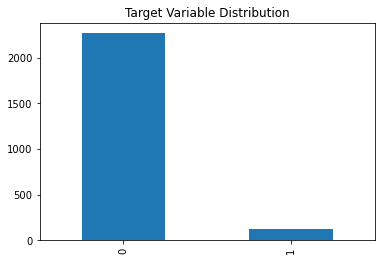

In [18]:
target_variable = 'Diagnosis'  # Replace with actual target variable name
df[target_variable].value_counts().plot(kind='bar', title="Target Variable Distribution")
plt.show()

### Plot the distribution of each feature to understand its range and central tendency.

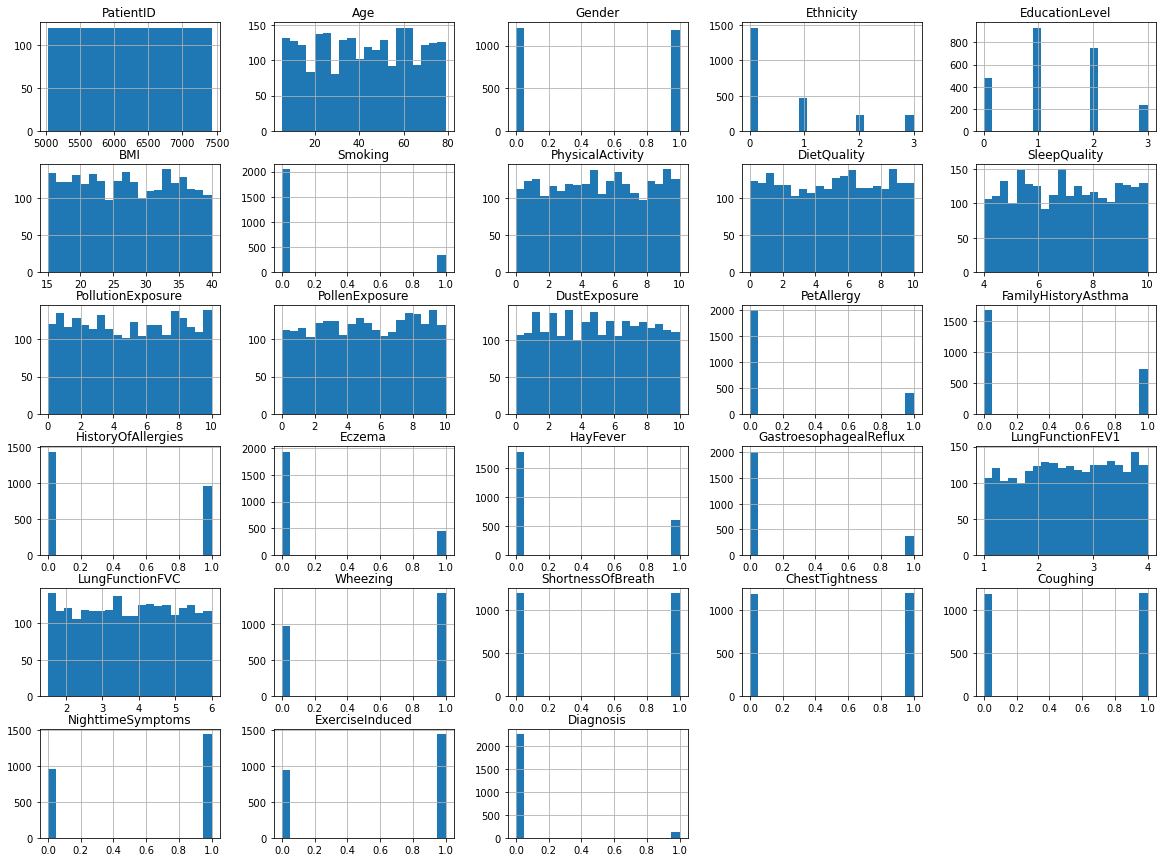

In [21]:
df.hist(bins=20, figsize=(20, 15))
plt.show()

### Generate a correlation matrix to understand relationships between numerical features.

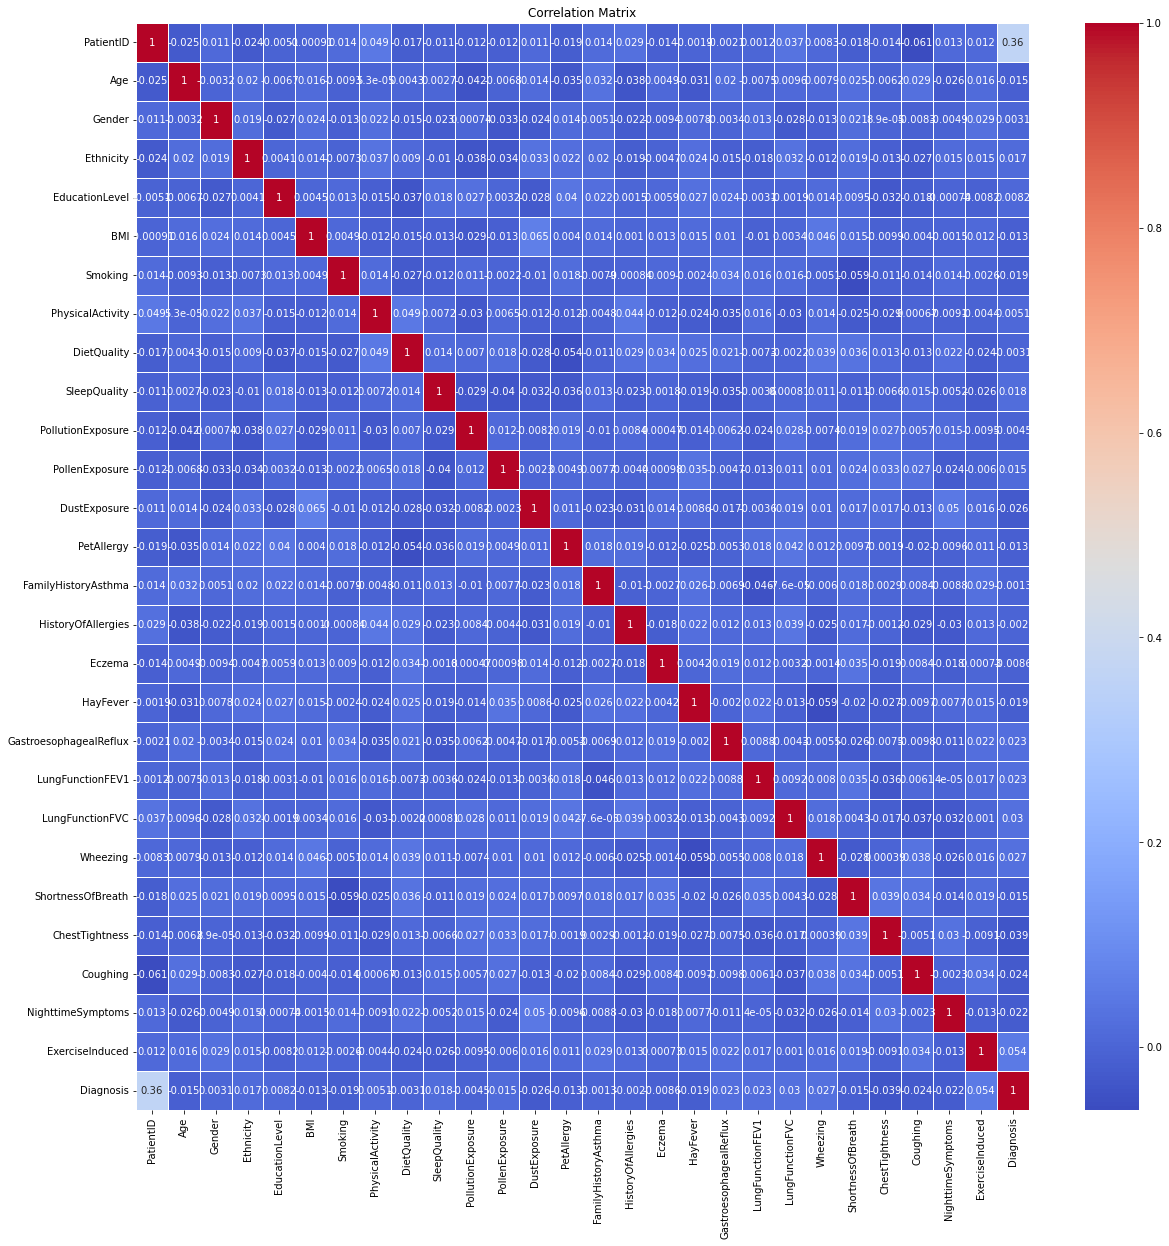

In [26]:
corr_matrix = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()
